In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
157/157 [==============================] - 85s 445ms/step - loss: 1.0740 - acc: 0.5025 - val_loss: 0.6894 - val_acc: 0.5368
Epoch 2/10
157/157 [==============================] - 69s 442ms/step - loss: 0.6790 - acc: 0.6062 - val_loss: 0.6774 - val_acc: 0.5368
Epoch 3/10
157/157 [==============================] - 70s 443ms/step - loss: 0.6471 - acc: 0.7150 - val_loss: 0.6349 - val_acc: 0.6874
Epoch 4/10
157/157 [==============================] - 70s 444ms/step - loss: 0.5861 - acc: 0.7959 - val_loss: 0.5369 - val_acc: 0.7864
Epoch 5/10
157/157 [==============================] - 72s 456ms/step - loss: 0.4714 - acc: 0.8325 - val_loss: 0.4314 - val_acc: 0.8276
Epoch 6/10
157/157 [==============================] - 70s 447ms/step - loss: 0.3605 - acc: 0.8672 - val_loss: 0.4046 - val_acc: 0.8466
Epoch 7/10
157/157 [==============================] - 70s 444ms/step - loss: 0.3079 - acc: 0.8899 - val_loss: 0.4081 - val_acc: 0.8572
Epoch 8/10
157/157 [==============================] - 7

In [4]:
history_dict=history.history

In [5]:
from matplotlib import pyplot as plt


In [6]:
epchs=range(0,10)

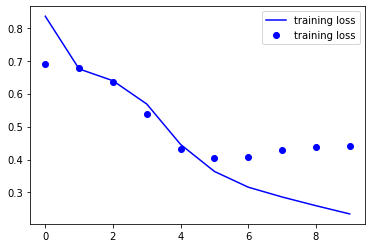

In [8]:
plt.plot(epchs,history_dict['loss'],'b',label="training loss" )
plt.plot(epchs,history_dict['val_loss'],'bo',label="training loss" )
plt.legend()
plt.show()

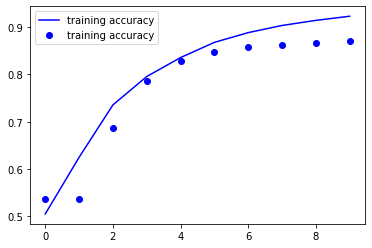

In [13]:
plt.plot(epchs,history_dict['acc'],'b',label="training accuracy" )
plt.plot(epchs,history_dict['val_acc'],'bo',label="training accuracy" )
plt.legend()
plt.show()

In [12]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [15]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 21s 27ms/step - loss: 0.4496 - acc: 0.8626


[0.449644535779953, 0.8626000285148621]